In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
#import pydotplus

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import *

In [3]:
#letras, letters_dict = ler_letras("../letras.csv")

In [4]:
data = pd.read_csv("../letras.csv", header = 0, sep=",")
list(data.columns.values)

['path', 'rotulo', 'caixa_alta_baixa']

In [5]:
#data['rotulo']

In [6]:
img_pixels = Image.open(data['path'][0])

In [7]:
#for i, file in enumerate(list(data['path'])):
    #print(file)

In [8]:
X = []
y = []

for i, file in enumerate(list(data['path'])):
    label = data['rotulo'][i]
    img_pixels = list(Image.open(file).getdata())
    X.append(img_pixels)
    y.append(label)

In [23]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Unsupervised Learnind: Dimensionality Reduction

In [24]:
print("temos {0} imagens cada uma com {1} dimensoes".format(len(X), len(X[0])))

temos 720 imagens cada uma com 1750 dimensoes


In [25]:
from sklearn.manifold import Isomap

In [26]:
iso = Isomap(n_components = 2)
data_projected = iso.fit_transform(X)

In [27]:
data_projected.shape

(720, 2)

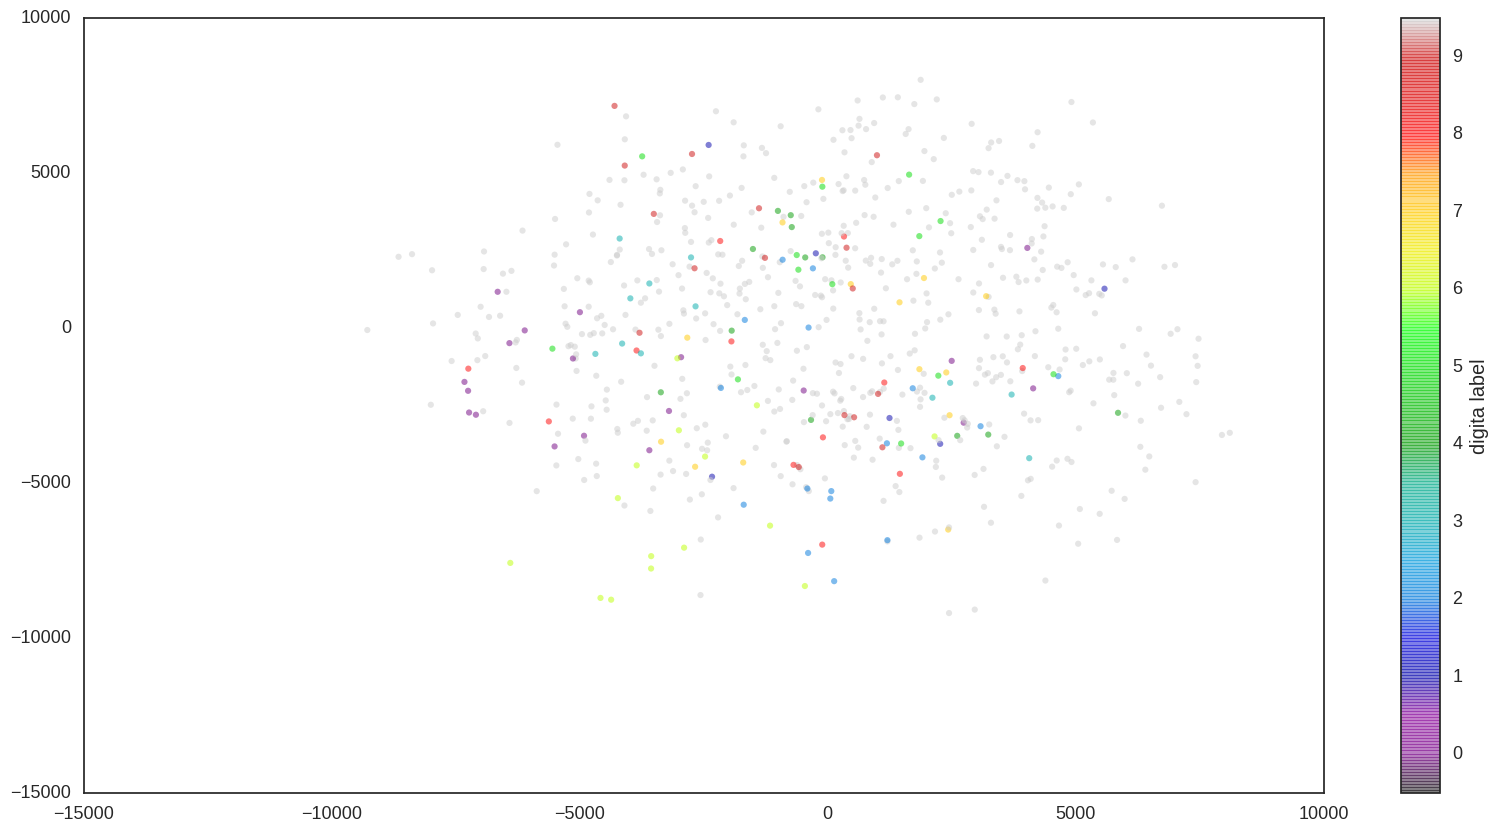

In [28]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.colorbar(label='digita label', ticks=range(10))
plt.clim(-0.5, 9.5)

A base relativa aos pixels esta muito confusa, as classes estao muito misturadas para os features (imagens).

# Divisao da base em treino e teste e aplicacao de algoritmos de aprendizado

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
%%time
from sklearn.neural_network import MLPClassifier

MLPparams = {'hidden_layer_sizes':(100, 20, 50),
             'activation' : ('identity', 'logistic', 'tanh', 'relu'),
             'solver' : ('lbfgs', 'sgd', 'adam'),
             'learning_rate': ('constant', 'invscaling', 'adaptative')
            }

svr = MLPClassifier(max_iter = 200000)
clfMLP = GridSearchCV(svr, MLPparams)
clfMLP = MLPClassifier()
clfMLP.fit( X = X_train, y = y_train )
print( "Score: {0}".format(clfMLP.score(X_test, y_test)) )
print( "Best parameters: " + str(clfMLP.get_params) )

Score: 0.037037037037037035
Best parameters: <bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)>
CPU times: user 37.7 s, sys: 31.1 s, total: 1min 8s
Wall time: 18.9 s


/home/ricardo/envs/facerecog/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [35]:
%%time
from sklearn.svm import SVC
clf = SVC() # kernel = 'poly', degree = 2, max_iter = 100000

SVMparams = { 'kernel' : ('linear', 'poly', 'rbf')} #, 'sigmoid')}

svr = SVC()
clf = GridSearchCV(svr, SVMparams)

clf.fit(X_train, y_train)
print( "Score: {0}".format(clf.score(X_test, y_test)) )
print( "Best parameters: " + str(clf.best_params_) )

/home/ricardo/envs/facerecog/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Score: 0.5277777777777778
Best parameters: {'kernel': 'poly'}
CPU times: user 12.7 s, sys: 220 ms, total: 12.9 s
Wall time: 12.9 s


In [41]:
%%time
from sklearn.ensemble import RandomForestClassifier
clfRF_balanced = RandomForestClassifier()


RFparams = {'n_estimators' : (10, 2, 3, 5, 7),
           'criterion' : ('gini', 'entropy'),
           'min_samples_split' : (2, 10, 40),
           'min_samples_leaf' : (1, 5, 10, 40)}

svr = RandomForestClassifier()
clfRF_balanced = GridSearchCV(svr, RFparams)
clfRF_balanced.fit( X = X_train, y = y_train )
print( "Score: {0}".format(clfRF_balanced.score(X_test, y_test)) )
print( "Best parameters: " + str(clfRF_balanced.best_params_) )

/home/ricardo/envs/facerecog/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Score: 0.24537037037037038
Best parameters: {'min_samples_split': 10, 'n_estimators': 10, 'min_samples_leaf': 5, 'criterion': 'gini'}
CPU times: user 1min 13s, sys: 536 ms, total: 1min 13s
Wall time: 1min 17s


In [47]:
imgs = skio.imread_collection(list(data['path']))
imgA = crop_char(imgs[0], 0)

In [48]:
print(clf.predict([item for sublist in imgA.tolist() for item in sublist]))

/home/ricardo/envs/facerecog/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X.shape[1] = 1500 should be equal to 1750, the number of features at training time

In [42]:
joblib.dump(clf, 'classifier_image.pkl') 

['classifier_image.pkl']